# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/machinelearning-az.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [ ]:
!pip install sklearn

# SVM

# Cómo importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables

In [5]:
# Para SVM también nos sirve el reescalado de los datos
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Ajustar el SVM en el Conjunto de Entrenamiento

In [6]:
from sklearn.svm import SVC

In [7]:
classifier = SVC(kernel = "linear", random_state = 0) # C: penalización del error, kernel:decide la forma de la separación (como estamos aplicando la separación clásica usamos el lineal, pero esta el rbf(gauss), poly, sigmoid o precomputed), degree: para el kernel poly, gamma: para kernel rbf, poly o sigmoid
classifier.fit(X_train, y_train) # que encuentre los hiperplanos separadores
print(classifier.get_params()) # para ver los parámetros de la regresión hecha
print(classifier.score(X_train,y_train)) # vemos el accuracy de la predicción de la clasificación (con datos de entrenamiento)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.8233333333333334


# Predicción de los resultados con el Conjunto de Testing


In [8]:
y_pred  = classifier.predict(X_test)

# Elaborar una matriz de confusión

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
# Vemos que el accuracy del modelo con respecto a los datos de test (sin tomar desbalanceo entre clases) es de 90/100 = 0,90
# En este caso, solo 2 observaciones fueron catalogadas como compras cuando en verdad no lo fueron, y 8 observaciones fueron catalogadas como no compras cuando en verdad lo fueron
# (no compras acertadas:66, compras acertadas:24)

array([[66,  2],
       [ 8, 24]], dtype=int64)

# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

In [11]:
from matplotlib.colors import ListedColormap

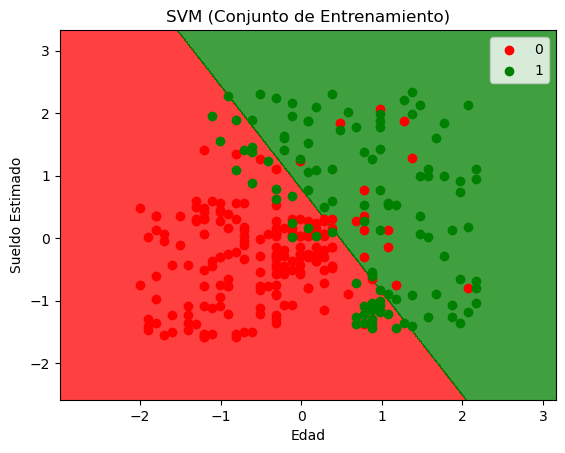

In [12]:
# Vemos el límite de nuestro clasificador (frontera de decisión) con respecto a los datos de train (82,33% de accuracy antes marcado). Usamos 2 variables indep para visualizar la clasificación en un gráfico 2D (podemos usar 3 para 3D)
# Crear el grid para el contorno
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Predecir sobre el grid de puntos y reshape para contorno
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Definir la paleta de colores usando códigos RGB 
colors = [(1, 0, 0), (0, 0.5, 0)] # rojo (no compra) y verde oscuro (compra) [(valor 0 de pred, valor 1 de pred)]
cmap = ListedColormap(colors)

# Graficar el contorno y los puntos de datos
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de datos con scatter
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=cmap(i), label=j)

plt.title('SVM (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# Es un clasificador lineal, ya que es un kernel lineal en el que se basa el delimitado de la frontera de predicción. Similar resultado al de la Regresión Logística

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing

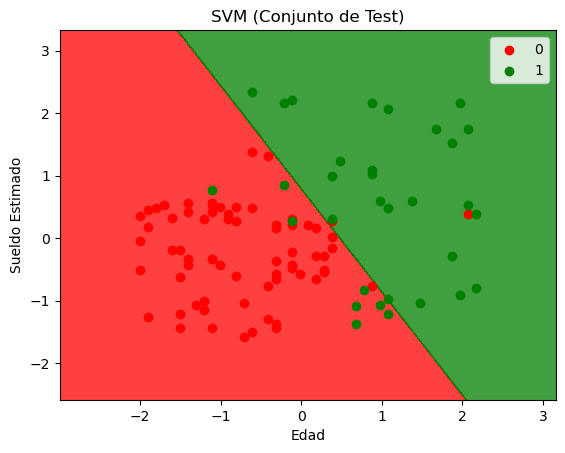

In [13]:
# Vemos el límite de nuestro clasificador (frontera de decisión) con respecto a los datos de test (90% de accuracy antes marcado). Similar análisis que con la matriz de confusión.
# Aplica la misma frontera de decisión conseguida con train a los datos de test. Análisis similar al de la matriz de confusión

# Crear el grid para el contorno
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Predecir sobre el grid de puntos y reshape para contorno
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Definir la paleta de colores usando códigos RGB 
colors = [(1, 0, 0), (0, 0.5, 0)] # rojo (no compra) y verde oscuro (compra) [(valor 0 de pred, valor 1 de pred)]
cmap = ListedColormap(colors)

# Graficar el contorno y los puntos de datos
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de datos con scatter
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=cmap(i), label=j)
plt.title('SVM (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()